# INTRODUCTION
Twitter produces hundreds of million messages per day, with people around the world discussing sports, politics, business, and entertainment. You can access thousands of messages flowing in this stream in a matter of minutes. In this course, you will learn how to collect Twitter data and analyze tweet text, Twitter networks, and the geographical origin of the tweet. We'll be doing this with datasets on tech companies, and data science hashtags.

# 1. Business Understanding
Social Media Analytics from data twitter, which is contain text from twitter scraping and target for each text. The target of sentiment consist of positive and negative. Positive and negative statement appear because of the performance organization.
# 2. Data Understanding
The data-understanding phase includes four tasks. These are
- Gathering data
- Describing data
- Exploring data
- Verifying data quality

### 2.1 Install Package and Load Library

In [1]:
!pip install nltk 
!pip install textblob 
!pip install re 
!pip install wordcloud 
!pip install tqdm 

You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Could not find a version that satisfies the requirement re (from versions: )
No matching distribution found for re
You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [35]:
import pandas as pd 
import numpy as np 

#import nltk for natural language toolkit
from nltk.corpus import stopwords
import nltk 
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

#import string, regex, , uniqcode
import re, string, unicodedata

#import sklearn preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#import sklearn for modeling
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#import tqdm 
from tqdm import tqdm 
tqdm.pandas()

#import beaurtiful soup 
from bs4 import BeautifulSoup

#save model 
import pickle 

#textblob
from textblob import Word
from textblob import TextBlob

#stemming
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nurlai064182\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nurlai064182\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nurlai064182\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 3.2 Load Data and Sneak Peak Dataset

In [3]:
#import dataset
df = pd.read_csv('dataset/clean_tweet.csv')
df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [4]:
df.shape

(1600000, 2)

There is 1600000 rows and 2 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text      1596753 non-null object
target    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


This dataset has feature with 2 type of data (object and integer)

# 3. Data Preparation
Data preparation is one of the most important and often time-consuming aspects of data mining. In this section, make data ready for modelling, cleansing, formatting, and sample exploratory data analysis.

## 3.1 Cleaning Data
In this section we should taking closer with problems in the data that have been chosen for analysis. Detect missing data, data errors, handling noise, anomaly detection, duplicate detection, etc.

### 3.1.1 Duplicate Detection
This is process of identifying different or multiple records that refer to one unique real-world entity or object.

In [6]:
#drop duplicate tweet 
df.drop_duplicates(keep= False, inplace=True)

In [7]:
#check the number of data after drop duplicate
len(df)

1509626

After we drop duplicates the data decrease, from 1600000 become 1509626. **Reduced data 90374**.

### 3.1.2 Remove Punctuation
This step is unnecessary because there is no data with html, regex text, square brackets, and non ascii data.

### 3.1.3 Stopwords Removal
**A stop word** is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

In [8]:
#stopword 
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['text'].head()

0         awww bummer shoulda got david carr third day
1    upset update facebook texting might cry result...
2    dived many times ball managed save rest go bounds
3                     whole body feels itchy like fire
4                                     behaving mad see
Name: text, dtype: object

### 3.1.4 Rare Words Removal
Delete the rare words which is indeed less important.

In [9]:
rare_word = pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]
rare_word

hrbek            1
squark           1
colda            1
twittertexts     1
roarke           1
                ..
bettwen          1
basecap          1
quitonpurpose    1
kodera           1
everywherer      1
Length: 1000, dtype: int64

In [10]:
%%time
#remove rare words
rare_word = list(rare_word.index)
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_word))
df['text'].head()

Wall time: 7min 44s


In [11]:
df['text'].head()

0         awww bummer shoulda got david carr third day
1    upset update facebook texting might cry result...
2    dived many times ball managed save rest go bounds
3                     whole body feels itchy like fire
4                                     behaving mad see
Name: text, dtype: object

### 3.1.8 Lemmatisation
This process involves first determining the part of speech of a word, and applying different normalization rules for each part of speech.

In [12]:
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['text'].head()

0         awww bummer shoulda got david carr third day
1    upset update facebook texting might cry result...
2      dived many time ball managed save rest go bound
3                      whole body feel itchy like fire
4                                     behaving mad see
Name: text, dtype: object

## 4. Data Exploration
In this section will describe results of this task EDA (Exploratory Data Analysis), including first findings or initial hypothesis and their impact on the remainder of the project. If appropriate include graphs and plots to indicate data characteristics that suggest further examination of interesting data subsets.

### 4.1 Explore Sentiment Class¶
In this section we will count the sentiment class the see the number of each class. So that we can know the highest and the lowest sentiment class.

In [13]:
#count sentiment 
sentiment = df.groupby(['target'])['target'].count()
sentiment

#make dataframe that will be created a chart 
chart = pd.DataFrame(sentiment)
chart['tweet_count'] = chart['target']
chart.drop(['target'], axis = 1, inplace = True )
chart = chart.reset_index()

#make a proportion of the number of tweet of each sentiment 
chart['percent'] = chart['tweet_count']/chart['tweet_count'].sum()
chart

,target,tweet_count,percent
0,0,759209,0.502912
1,1,750417,0.497088


Based on the result of sentiment class, we can know that the percentage of **0=negative sentiment** is bigger than **1=positive sentiment**. The following explanation:
- negative statement = 50.2%
- positive statement = 49.7%

In [14]:
chart=chart.replace({'target': {0: 'negative', 1: 'positive'}})

In [15]:
chart

,target,tweet_count,percent
0,negative,759209,0.502912
1,positive,750417,0.497088


### 4.2 Visualization
Explore Data Analysis with some of visualization

#### 4.2.1 Barchart

Text(0.5, 1.0, 'Barplot Sentiment Class')

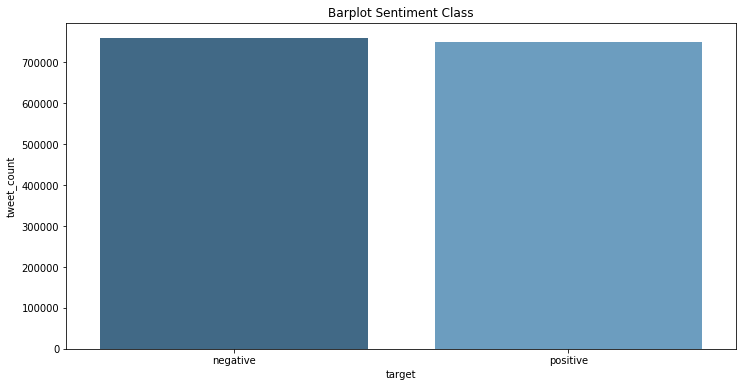

In [16]:
#visualization 
plt.figure(figsize=(12,6))
ax = sns.barplot(x= 'target', y='tweet_count', data=chart, palette="Blues_d")
ax.set_title('Barplot Sentiment Class')

#### 4.2.2 Pie chart

(-1.1157258496740226,
 1.2564504075972134,
 -1.1173495092726582,
 1.283460928210923)

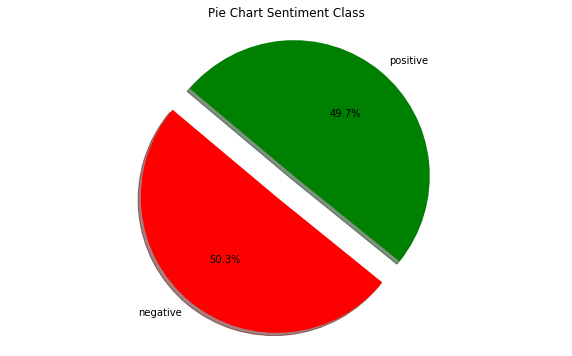

In [17]:
colors = [ 'red','green']
explode = (0, 0.2)  # explode 1st slice
# Plot
figure = plt.figure(figsize= (10,6))
plt.pie(chart['tweet_count'], explode=explode, labels=chart['target'], colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Pie Chart Sentiment Class')
plt.axis('equal')

#### 4.2.3 Word Cloud
**WordCloud** is a technique to show which words are the most frequent among the given text. In this section we will explore data and analysis the insight with word cloud.

In [18]:
#define negative, neutral, and positive sentiment 
negative = df.loc[df['target'] == 0]
positive  = df.loc[df['target'] == 1]

In [19]:
#merge all the negative, neutral, and positive comments into one paragraph
all_negative = "".join(negative.text.values)
all_positive = "".join(positive.text.values)
alls = all_negative+all_positive

### Positive Word Cloud

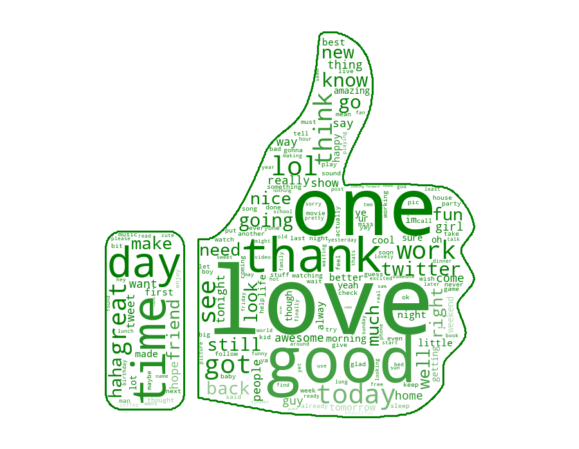

In [36]:
from PIL import Image
mask = np.array(Image.open("dataset/thumb.png"))
image_colors = ImageColorGenerator(mask)
cloud = WordCloud(background_color = "white", mask = mask, color_func = image_colors, contour_width = 2, contour_color = 'green', max_words = 200, stopwords = set(STOPWORDS)).generate(all_positive)
cloud.to_file("dataset/thumbgood.png")
plt.figure(figsize = (16, 8))
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Based on the visualization word cloud **positive statement** from 200 word, **the most words that appear are love, good, and thank**.

Again we see some netural words in big size, "love", "one", "thank", "good", "time" but words like "haha", "lol", "think"  also stand out.
Interestingly, the word "work" was quite big in negative word cloud, but also quite big in positive word cloud. **It might implies that many people express negative sentiment towards work, but also many people are positive about works.**

### Negative Word Cloud

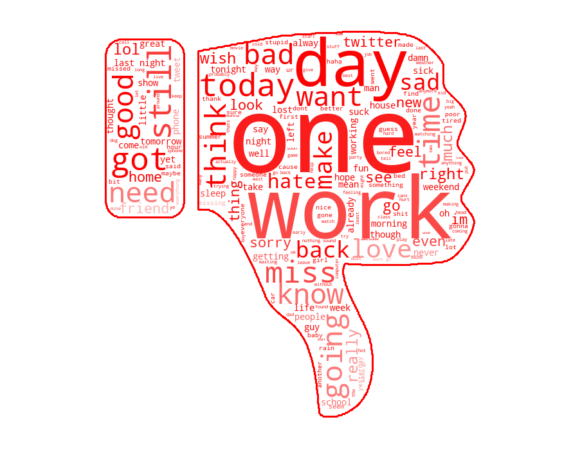

In [37]:
from PIL import Image
mask = np.array(Image.open("dataset/thumb1.png"))
image_colors = ImageColorGenerator(mask)
cloud = WordCloud(background_color = "white", mask = mask, color_func = image_colors, contour_width = 2, contour_color = 'red', max_words = 200, stopwords = set(STOPWORDS)).generate(all_negative)
cloud.to_file("dataset/thumbbad.png")
plt.figure(figsize = (16, 8))
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Based on the visualization word cloud **negative statement** from 200 word, **the most words that appear are one day and work**.<br>

Some of big words can be interpreted quite neutral, such as "today", "now",etc. We can see some of the words in smaller size make sense to be in negative tweets, such as "damn", "ugh", "miss", "bad", etc. But there is "love" in rather big size, so we can check what something happened.

In [40]:
for t in negative.text[:200]:
    if 'love' in t:
        print(t)

ahh ive always wanted see rent love soundtrack
meh almost lover exception track get depressed every time
awe love miss
damn grind inspirational saddening time want stop cuz like u much love
missing babe long alive happy yawwwnn tired love imma try sleep hopefully headstart
love french tell people south qtr french snarl french beautiful people


OK, even though the tweets contain the word "love", which is should enter in positive words. In these cases it is negative sentiment, because the tweet has mixed emotions like "love" but "miss". **Or sometimes used in a sarcastic way.**

### 4.3 Feature Extraction
**Feature extraction** is involves reducing the number of resources required to describe a large set of data. It addresses the problem of attaining the most informative and compact set of features, to improve the performance of machine learning models.
In this section we will practice feature extraction with two algorithm:
- Count vectorizer is used to convert text to word count vectors
- TF-IDF vectorizer is used to convert text to word frequency vectors

#### 4.3.1 Count Vectorizer

In [22]:
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

The result of CountVectorizer have some **parameter**:
- **analyzer: string, {‘word’, ‘char’, ‘char_wb’} or callable**<br>
  Data is first read from the file and then passed to the given callable analyzer
- **binary : boolean, default=False**<br>
  This is useful for discrete probabilistic models that model binary events rather than integer counts.
- **encoding : string, ‘utf-8’ by default.**<br>
   If bytes or files are given to analyze, this encoding is used to decode.
- **input : string {‘filename’, ‘file’, ‘content’}**<br>
  The input is expected to be the sequence strings or bytes items are expected to be analyzed directly.
- **lowercase : boolean, True by default**<br>
  Convert all characters to lowercase before tokenizing.
- **max_df : float in range [0.0, 1.0] or int, default=1.0**<br>
  If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.
- **max_features : int or None, default=None** <br>
  If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

#### 4.3.2 TF-IDF Vectorizer
This is an acronym than stands for “Term Frequency – Inverse Document” Frequency which are the components of the resulting scores assigned to each word. In this section will implement three parameters of TF-IDF:
- **min_df : float in range [0.0, 1.0] or int (default=1)** <br>
    When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None
- **max_df : float in range [0.0, 1.0] or int (default=1.0)** <br>
    When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.
- **stop_words_ : set**<br>
    Terms that were ignored because they either:
    occurred in too many documents (max_df)
    occurred in too few documents (min_df)
    were cut off by feature selection (max_features).
    This is only available if no vocabulary was given.

In [23]:
tfidf = TfidfVectorizer(stop_words='english',
                        min_df = 5,
                        max_df = 0.75,
                        use_idf = True)
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.75, max_features=None,
                min_df=5, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

## 5. Modeling

### 5.1 Train Test Split

In [24]:
X = df['text']
y = df['target']

In [25]:
#countvectorizer
X_vectorizer = count_vectorizer.fit_transform(X)

#tfidf vectorizer
X_tfidf = tfidf.fit_transform(X)

In [26]:
#train test split using countvectorizer 
train_X_vectorizer, test_X_vectorizer, train_y, test_y = train_test_split(X_vectorizer, y, test_size=0.2, random_state=0)

#train test split using tfidfvectorizer 
train_X_tfidf, test_X_tfidf, train_y, test_y = train_test_split(X_tfidf, y, test_size=0.2, random_state=0)

### 5.2 Model Machine Learning

#### 5.2.1 Logistic Regression

In [27]:
# Countvectorizer 
Lr_vect = LogisticRegression()
Lr_vect.fit(train_X_vectorizer,train_y)
Lr_pred_vect_train = Lr_vect.predict(train_X_vectorizer)
Lr_pred_vect_test = Lr_vect.predict(test_X_vectorizer)

C:\Users\nurlai064182\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
# TFIDFVectorizer
Lr_tfidf = LogisticRegression()
Lr_tfidf.fit(train_X_tfidf,train_y)
Lr_pred_tfidf_train = Lr_tfidf.predict(train_X_tfidf)
Lr_pred_tfidf_test = Lr_tfidf.predict(test_X_tfidf)

C:\Users\nurlai064182\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### 5.2.2 Naive Bayes

In [29]:
# Countvectorizer
NB_vect = MultinomialNB()
NB_vect.fit(train_X_vectorizer,train_y)
NB_pred_vect_train = NB_vect.predict(train_X_vectorizer)
NB_pred_vect_test = NB_vect.predict(test_X_vectorizer)

In [30]:
# TFIDFVectorizer
#from sklearn.naive_bayes import GaussianNB
NB_tfidf = MultinomialNB()
NB_tfidf.fit(train_X_tfidf,train_y)
NB_pred_tfidf_train = NB_tfidf.predict(train_X_tfidf)
NB_pred_tfidf_test = NB_tfidf.predict(test_X_tfidf)

## 6. Evaluation

The following option are kind of model evaluation that used.
- Precision = precision_score()
- Recall = recall_score()
- F_measure = f1_score()

### 6.1 Logistic Regression

In [31]:
# using count vectorizer
print("______________ Countvectorizer ______________")

Lr_recall_vec_train = recall_score(train_y, Lr_pred_vect_train, average="micro")
Lr_recall_vec_test = recall_score(test_y, Lr_pred_vect_test,average="micro") 

Lr_precision_vec_train = precision_score(train_y, Lr_pred_vect_train,average="micro")
Lr_precision_vec_test = precision_score(test_y, Lr_pred_vect_test,average="micro")

Lr_f1_score_vec_train = f1_score(train_y, Lr_pred_vect_train,average="micro")
Lr_f1_score_vec_test = f1_score(test_y,Lr_pred_vect_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (Lr_recall_vec_train * 100), '&', '%.2f%%' % (Lr_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_vec_train * 100), '&', '%.2f%%' % (Lr_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_vec_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

______________ Countvectorizer ______________
Information :
Recall train & test     : 79.93% & 76.48%
Precision train & test  : 79.93% & 76.48%
F1 Score train & test   : 79.93% & 76.48%


In [32]:
# using tf/idf vectorizer
print("______________ TF-IDF ______________")

Lr_recall_tfidf_train = recall_score(train_y, Lr_pred_tfidf_train, average="micro")
Lr_recall_tfidf_test = recall_score(test_y, Lr_pred_tfidf_test,average="micro") 

Lr_precision_tfidf_train = precision_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_precision_tfidf_test = precision_score(test_y, Lr_pred_tfidf_test,average="micro")

Lr_f1_score_tfidf_train = f1_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_f1_score_tfidf_test = f1_score(test_y,Lr_pred_tfidf_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (Lr_recall_tfidf_train * 100), '&', '%.2f%%' % (Lr_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_tfidf_train * 100), '&', '%.2f%%' % (Lr_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_tfidf_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

______________ TF-IDF ______________
Information :
Recall train & test     : 78.03% & 76.64%
Precision train & test  : 78.03% & 76.64%
F1 Score train & test   : 78.03% & 76.48%


### 6.2 Naive Bayes

In [33]:
# find model evaluation for naive bayes
# using count vectorizer
print("______________ Countvectorizer ______________")

NB_recall_vec_train = recall_score(train_y, NB_pred_vect_train, average="micro")
NB_recall_vec_test = recall_score(test_y, NB_pred_vect_test,average="micro") 

NB_precision_vec_train = precision_score(train_y, NB_pred_vect_train,average="micro")
NB_precision_vec_test = precision_score(test_y, NB_pred_vect_test,average="micro")

NB_f1_score_vec_train = f1_score(train_y, NB_pred_vect_train,average="micro")
NB_f1_score_vec_test = f1_score(test_y,NB_pred_vect_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (NB_recall_vec_train * 100), '&', '%.2f%%' % (NB_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_vec_train * 100), '&', '%.2f%%' % (NB_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_vec_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

______________ Countvectorizer ______________
Information :
Recall train & test     : 78.71% & 75.63%
Precision train & test  : 78.71% & 75.63%
F1 Score train & test   : 78.71% & 75.63%


In [34]:
# using tf/idf vectorizer
print("______________ TF-IDF ______________")

NB_recall_tfidf_train = recall_score(train_y, NB_pred_tfidf_train, average="micro")
NB_recall_tfidf_test = recall_score(test_y, NB_pred_tfidf_test,average="micro") 

NB_precision_tfidf_train = precision_score(train_y, NB_pred_tfidf_train,average="micro")
NB_precision_tfidf_test = precision_score(test_y, NB_pred_tfidf_test,average="micro")

NB_f1_score_tfidf_train = f1_score(train_y, NB_pred_tfidf_train,average="micro")
NB_f1_score_tfidf_test = f1_score(test_y,NB_pred_tfidf_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (NB_recall_tfidf_train * 100), '&', '%.2f%%' % (NB_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_tfidf_train * 100), '&', '%.2f%%' % (NB_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_tfidf_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

______________ TF-IDF ______________
Information :
Recall train & test     : 76.64% & 74.98%
Precision train & test  : 76.64% & 74.98%
F1 Score train & test   : 76.64% & 75.63%


# CONCLUSION
In this modeling using 2000 data for sample from 1509626.
Based on the classification of the dataset that has been processed using CRISP-DM. It is known that the sentiment class is mostly in the negative sentiment class, compared to the positive sentiment class. Information as follows:
1. Negative sentiment class : 50.3%
2. Positive sentiment class : 49.7%

**Insight**
- Based on the result of word cloud, we can know that some words that are generally entered in positive words, can enter the negative word class, for example "love". In these cases it is negative sentiment, because the tweet has mixed emotions like "love" but "miss". Or **sometimes used in a sarcastic way.**
- Based on the result of word cloud, there is some word was quite big in negative word cloud, but also quite big in positive word cloud. **It might implies that many people express negative sentiment towards work, but also many people are positive about works.**
- In this section, using two type of modeling. Compare model between logistic regression and naive bayes. The results of the model evaluation are obtained from the CountVectorizer and TF/IDF Vectorizer values based on *recall, precision, and F1 score* from data train and test. We get that the result of **Logistic Regression is better than Naive Bayes model**.
- From the point of view business, the business must increase their service, so that the positive sentiment increase than before on social media. So the performance of the company's performance from the outside looks good too, because outsiders can see the company's performance using media, one of the is social media.